# **EDA Notebook**



---
## 0. Setup Environment

In [ ]:
# DO NOT MODIFY THE CODE IN THIS CELL
!pip install -q utstd

from utstd.folders import *
from utstd.ipyrenders import *

at = AtFolder(
    course_code=36106,
    assignment="AT3",
)
at.run()

import warnings
warnings.simplefilter(action='ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.5.2 which is incompatible.
Mounted at /content/gdrive

You can now save your data files in: /content/gdrive/MyDrive/36106/assignment/AT3/data


---
## Student Information

In [ ]:
# <Student to fill this section>
group_name = "AT3-group 12"
student_name = "CEWANG"
student_id = "25687207"

In [ ]:
# Do not modify this code
print_tile(size="h1", key='group_name', value=group_name)

In [ ]:
# Do not modify this code
print_tile(size="h1", key='student_name', value=student_name)

In [ ]:
# Do not modify this code
print_tile(size="h1", key='student_id', value=student_id)

---
## 0. Python Packages

### 0.a Install Additional Packages

> If you are using additional packages, you need to install them here using the command: `! pip install <package_name>`

In [ ]:
!pip install -q scikit-learn matplotlib

### 0.b Import Packages

In [ ]:
# <Student to fill this section>
import pandas as pd
import altair as alt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

---
## B. Data Understanding

In [ ]:
# Do not modify this code
try:
  df = pd.read_csv(at.folder_path / "customers.csv")
except Exception as e:
  print(e)

### B.1 Explore Dataset

In [ ]:
print("Dataset Head:")
display(df.head())

print("\nDataset Info:")
print(df.info())

print("\nDescriptive Statistics:")
display(df.describe(include='all'))

print("\nMissing Values:")
print(df.isnull().sum())

print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")

print("\nUnique values in categorical columns:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

Dataset Head:


,Unnamed: 0,customer_id,prefix,first_name,last_name,birth_date,marital_status,email_address,annual_income,number_dependents,education_level,occupation,homeowner
0,0,2126f7da-90b6-4cca-aa14-3d19d3d847ee,MS.,GABRIELLE,GONZALEZ,1966-03-18,S,gabrielle52@adventure-works.com,60000.0,0.0,Graduate Degree,Skilled Manual,Y
1,1,94400f64-b5c5-4265-937b-d1b5e9f3ddbe,MR.,EVAN,BAKER,1952-02-22,S,evan32@adventure-works.com,60000.0,2.0,High School,Professional,Y
2,2,06f7ae8d-9592-486a-b7e3-55e620cb3edd,MR.,PUNYA,PALIT,1969-01-13,S,punya0@adventure-works.com,50000.0,2.0,Bachelors,Skilled Manual,N
3,3,11d44a25-9fb2-440d-a63d-836122ab69bd,MRS.,DESTINY,MOORE,1949-02-09,S,destiny8@adventure-works.com,30000.0,4.0,High School,Professional,Y
4,4,35da8878-543c-4e56-8ceb-c6009782446b,MS.,MACKENZIE,YOUNG,1977-08-21,S,mackenzie38@adventure-works.com,40000.0,0.0,High School,Skilled Manual,Y



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19969 entries, 0 to 19968
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         19969 non-null  int64  
 1   customer_id        19969 non-null  object 
 2   prefix             19823 non-null  object 
 3   first_name         19963 non-null  object 
 4   last_name          19963 non-null  object 
 5   birth_date         19966 non-null  object 
 6   marital_status     19963 non-null  object 
 7   email_address      19963 non-null  object 
 8   annual_income      19963 non-null  float64
 9   number_dependents  19963 non-null  float64
 10  education_level    19963 non-null  object 
 11  occupation         19963 non-null  object 
 12  homeowner          19963 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.0+ MB
None

Descriptive Statistics:


,Unnamed: 0,customer_id,prefix,first_name,last_name,birth_date,marital_status,email_address,annual_income,number_dependents,education_level,occupation,homeowner
count,19969.000000,19969,19823,19963,19963,19966,19963,19963,19963.000000,19963.000000,19963,19963,19963
unique,NaN,19967,4,666,372,8191,2,18148,NaN,NaN,5,5,2
top,NaN,965366fe-80c1-48bc-841d-076a238bffd7,MR.,MARCUS,DIAZ,1967-05-14,M,tanya3@adventure-works.com,NaN,NaN,Bachelors,Professional,Y
freq,NaN,3,10046,105,241,15,10803,2,NaN,NaN,5792,5961,13498
mean,9984.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57245.904924,1.840054,NaN,NaN,NaN
std,5764.698098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32188.002748,1.615045,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000,0.000000,NaN,NaN,NaN
25%,4992.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30000.000000,0.000000,NaN,NaN,NaN
50%,9984.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60000.000000,2.000000,NaN,NaN,NaN
75%,14976.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70000.000000,3.000000,NaN,NaN,NaN



Missing Values:
Unnamed: 0             0
customer_id            0
prefix               146
first_name             6
last_name              6
birth_date             3
marital_status         6
email_address          6
annual_income          6
number_dependents      6
education_level        6
occupation             6
homeowner              6
dtype: int64

Number of duplicate rows: 0

Unique values in categorical columns:
customer_id: 19967 unique values
prefix: 4 unique values
first_name: 666 unique values
last_name: 372 unique values
birth_date: 8191 unique values
marital_status: 2 unique values
email_address: 18148 unique values
education_level: 5 unique values
occupation: 5 unique values
homeowner: 2 unique values


In [ ]:
# <Student to fill this section>
dataset_insights = """
Data Overview:
- Dataset contains 19,969 rows and 13 columns representing customer information
- This is a substantial dataset suitable for customer segmentation analysis

Column Analysis:
- customer_id: Unique customer identifier (19,967 unique values, 2 duplicates found)
- prefix: Customer title (4 unique values: MR., MS., MRS., with some missing values)
- first_name, last_name: Personal names (some missing values present)
- birth_date: Customer birth dates (should be converted to datetime)
- marital_status: Marital status (2 categories: M, S)
- email_address: Customer email (mostly unique)
- annual_income: Numerical feature ranging from 10,000 to 170,000
- number_dependents: Number of dependents (0-5)
- education_level: 5 education categories (Bachelors most frequent)
- occupation: 5 occupation types (Professional most frequent)
- homeowner: Binary flag (Y/N, mostly homeowners)

Data Quality Issues:
- Missing values in multiple columns (prefix: 146, other columns: 6 each)
- Duplicate customer_ids found (2 customers have duplicate IDs)
- Unnamed: 0 column is redundant
- Birth_date stored as string, needs conversion
- Some categorical columns have inconsistent formatting

Clustering Potential:
- Strong features for segmentation: annual_income, education_level, occupation, homeowner
- Demographic features: age (from birth_date), marital_status, number_dependents
- This dataset provides excellent foundation for customer segmentation analysis
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='dataset_insights', value=dataset_insights)

### B.2 Explore Feature of Interest `annual_income`

Annual Income Analysis:
Missing values: 6
Basic statistics:
count     19963.000000
mean      57245.904924
std       32188.002748
min       10000.000000
25%       30000.000000
50%       60000.000000
75%       70000.000000
max      170000.000000
Name: annual_income, dtype: float64


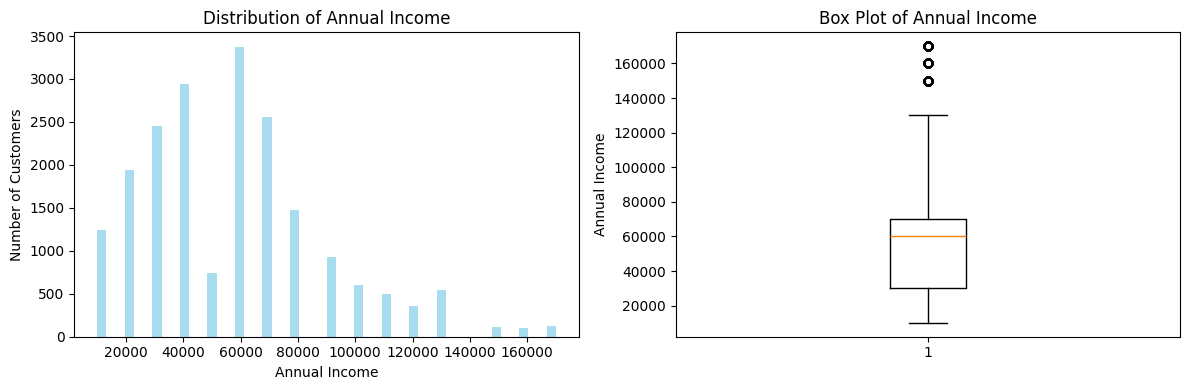

In [ ]:
print("Annual Income Analysis:")
print(f"Missing values: {df['annual_income'].isnull().sum()}")
print(f"Basic statistics:")
print(df['annual_income'].describe())

df_sample = df.sample(frac=0.2, random_state=42)

histogram = alt.Chart(df_sample).mark_bar().encode(
    x=alt.X('annual_income:Q', bin=alt.Bin(maxbins=50), title='Annual Income'),
    y=alt.Y('count():Q', title='Number of Customers'),
    tooltip=['count()']
).properties(
    title='Distribution of Annual Income (20% Sample)',
    width=600,
    height=400
)

box_plot = alt.Chart(df_sample).mark_boxplot().encode(
    y=alt.Y('annual_income:Q', title='Annual Income')
).properties(
    title='Box Plot of Annual Income',
    width=200,
    height=400
)

histogram | box_plot

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df['annual_income'].dropna(), bins=50, alpha=0.7, color='skyblue')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Number of Customers')

plt.subplot(1, 2, 2)
plt.boxplot(df['annual_income'].dropna())
plt.title('Box Plot of Annual Income')
plt.ylabel('Annual Income')

plt.tight_layout()
plt.show()

In [ ]:
feature_1_insights = """
Feature Analysis: annual_income
- Feature Type: Continuous numerical variable
- Value Range: $10,000 to $170,000
- Central Tendency:
  - Mean: $57,245
  - Median: $60,000
- Distribution Shape: Multi-modal distribution with clear peaks around $30K, $60K, and $70K
- Data Quality: 6 missing values (0.03%) need handling
- Distribution Characteristics:
  - Strong concentration at $30,000, $60,000, and $70,000 (likely common salary brackets)
  - Right-skewed with long tail towards higher incomes
  - Multiple distinct customer segments visible in the distribution
- Outliers: High-income customers above $100,000 represent premium segment
- Clustering Value: Extremely important for customer segmentation. Income directly correlates with purchasing power and customer lifetime value.
- Business Segments Identifiable:
  - Budget segment: <$40,000
  - Middle-income: $40,000-$80,000
  - Premium segment: >$80,000
- Preprocessing: Will require standardization and potentially outlier treatment for optimal clustering performance.
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='feature_1_insights', value=feature_1_insights)

### B.3 Explore Feature of Interest `\<put feature name here\>`

Education Level Analysis:
Missing values: 6

Value counts:
education_level
Bachelors              5792
Partial College        5449
High School            3558
Graduate Degree        3452
Partial High School    1712
Name: count, dtype: int64

Percentage distribution:
education_level
Bachelors              29.01
Partial College        27.30
High School            17.82
Graduate Degree        17.29
Partial High School     8.58
Name: proportion, dtype: float64


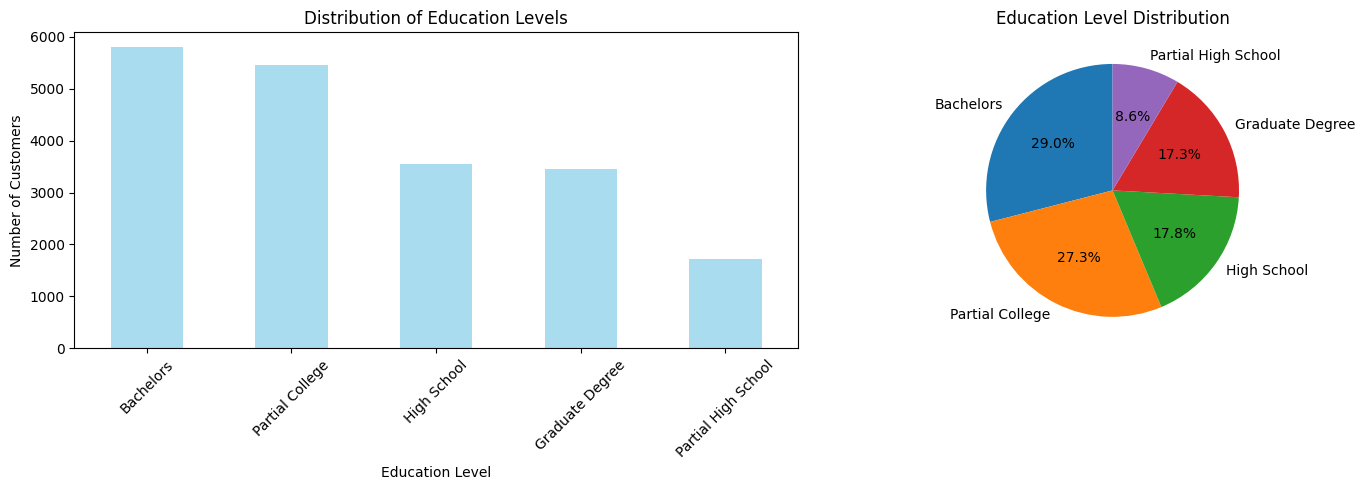

In [ ]:
print("Education Level Analysis:")
print(f"Missing values: {df['education_level'].isnull().sum()}")
print("\nValue counts:")
education_counts = df['education_level'].value_counts()
print(education_counts)

print("\nPercentage distribution:")
education_percent = df['education_level'].value_counts(normalize=True) * 100
print(education_percent.round(2))

df_sample = df.sample(frac=0.3, random_state=42)

education_chart = alt.Chart(df_sample).mark_bar().encode(
    x=alt.X('education_level:N', sort='-y', title='Education Level'),
    y=alt.Y('count():Q', title='Number of Customers'),
    color=alt.Color('education_level:N', legend=None),
    tooltip=['education_level', 'count()']
).properties(
    title='Distribution of Education Levels (30% Sample)',
    width=500,
    height=400
)

pie_chart = alt.Chart(df_sample).mark_arc().encode(
    theta=alt.Theta(field="education_level", type="nominal", aggregate="count"),
    color=alt.Color('education_level:N', title='Education Level'),
    tooltip=['education_level', 'count()']
).properties(
    title='Education Level Proportion',
    width=300,
    height=300
)

education_chart | pie_chart

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
education_counts.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.pie(education_counts.values, labels=education_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Education Level Distribution')

plt.tight_layout()
plt.show()

In [ ]:
# <Student to fill this section>
feature_2_insights = """
Feature Analysis: education_level
- Feature Type: Categorical ordinal variable
- Categories: 5 distinct education levels
- Distribution:
  - Bachelors: 29.0% (most common)
  - Partial College: 27.3%
  - High School: 17.8%
  - Graduate Degree: 17.3%
  - Partial High School: 8.6% (least common)
- Data Quality: 6 missing values (0.03%)
- Distribution Pattern: Relatively balanced with concentration in higher education levels
- Ordinal Nature: Education levels have inherent ordering:
  Partial High School < High School < Partial College < Bachelors < Graduate Degree
- Key Insights:
  - Over 56% of customers have college-level education or higher
  - Only 8.6% have incomplete high school education
  - Customer base is relatively well-educated
- Clustering Value: High importance for segmentation. Education correlates with:
  - Income levels and purchasing power
  - Product preferences and brand choices
  - Digital literacy and online shopping behavior
- Business Application:
  - Target graduate degree holders with premium products
  - Customize marketing messages based on education level
  - Develop educational content for different segments
- Preprocessing: Convert to numerical scale (1-5) respecting ordinal relationship
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='feature_2_insights', value=feature_2_insights)

### B.4 Explore Feature of Interest `occupation`

Occupation Analysis:
Missing values: 6

Value counts:
occupation
Professional      5961
Skilled Manual    4964
Management        3315
Clerical          3124
Manual            2599
Name: count, dtype: int64

Percentage distribution:
occupation
Professional      29.86
Skilled Manual    24.87
Management        16.61
Clerical          15.65
Manual            13.02
Name: proportion, dtype: float64


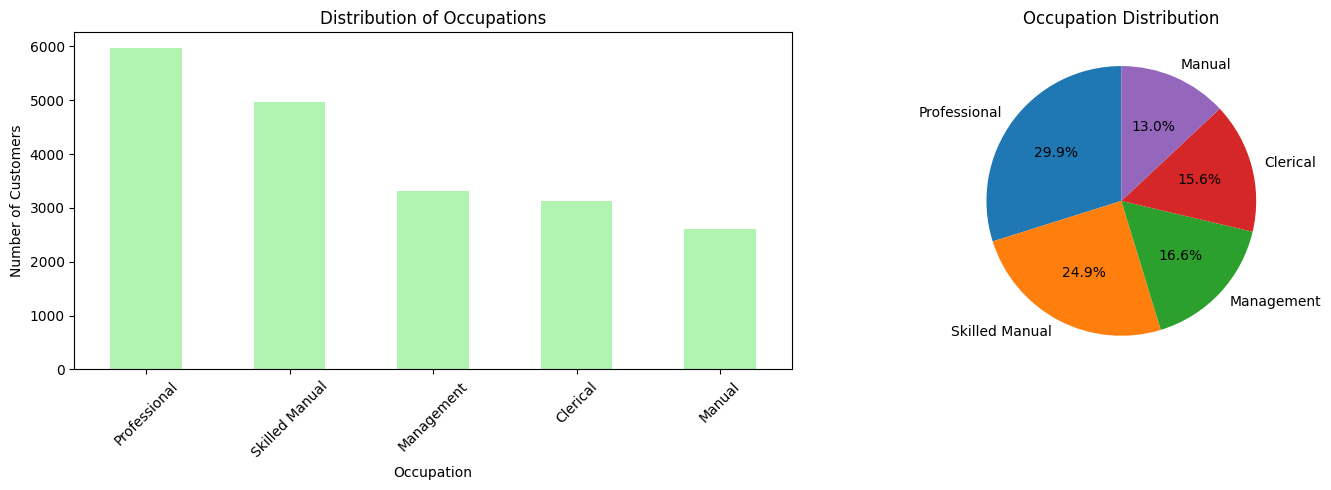

In [ ]:
print("Occupation Analysis:")
print(f"Missing values: {df['occupation'].isnull().sum()}")
print("\nValue counts:")
occupation_counts = df['occupation'].value_counts()
print(occupation_counts)

print("\nPercentage distribution:")
occupation_percent = df['occupation'].value_counts(normalize=True) * 100
print(occupation_percent.round(2))

df_sample = df.sample(frac=0.3, random_state=42)

occupation_chart = alt.Chart(df_sample).mark_bar().encode(
    x=alt.X('occupation:N', sort='-y', title='Occupation'),
    y=alt.Y('count():Q', title='Number of Customers'),
    color=alt.Color('occupation:N', legend=None),
    tooltip=['occupation', 'count()']
).properties(
    title='Distribution of Occupations (30% Sample)',
    width=500,
    height=400
)

pie_chart = alt.Chart(df_sample).mark_arc().encode(
    theta=alt.Theta(field="occupation", type="nominal", aggregate="count"),
    color=alt.Color('occupation:N', title='Occupation'),
    tooltip=['occupation', 'count()']
).properties(
    title='Occupation Proportion',
    width=300,
    height=300
)

occupation_chart | pie_chart

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
occupation_counts.plot(kind='bar', color='lightgreen', alpha=0.7)
plt.title('Distribution of Occupations')
plt.xlabel('Occupation')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.pie(occupation_counts.values, labels=occupation_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Occupation Distribution')

plt.tight_layout()
plt.show()

In [ ]:
feature_n_insights = """
Feature Analysis: occupation
- Feature Type: Categorical nominal variable
- Categories: 5 distinct occupation types
- Distribution:
  - Professional: 29.9% (most common)
  - Skilled Manual: 24.9%
  - Management: 16.6%
  - Clerical: 15.7%
  - Manual: 13.0% (least common)
- Data Quality: 6 missing values (0.03%)
- Distribution Pattern: White-collar occupations dominate (Professional + Management = 46.5%)
- Key Insights:
  - Professional occupation is the largest single group
  - Balanced distribution between professional and skilled trades
  - Management positions represent significant segment
  - Diverse occupational background across customer base
- Clustering Value: Very important for segmentation. Occupation correlates with:
  - Income levels and purchasing power
  - Work lifestyle and daily routines
  - Product preferences and brand affinities
  - Shopping behavior and channel preferences
- Business Application:
  - Target professionals with premium office products
  - Offer durable tools and equipment for skilled manual workers
  - Provide luxury goods and services for management segment
  - Customize marketing timing based on work schedules
- Preprocessing: Use one-hot encoding for clustering algorithms
- Segmentation Potential: Can create distinct customer personas based on occupation types
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='feature_n_insights', value=feature_n_insights)

---
## C. Data Cleaning

In [ ]:
# Do not modify this code
try:
  df_clean = df.copy()
except Exception as e:
  print(e)

### C.1 Fixing "Redundant Unnamed: 0 column"

In [ ]:
print("Before cleaning - Columns:", df_clean.columns.tolist())
print("Before cleaning - Shape:", df_clean.shape)

df_clean = df_clean.drop(columns=['Unnamed: 0'])

print("\nAfter cleaning - Columns:", df_clean.columns.tolist())
print("After cleaning - Shape:", df_clean.shape)
print("\nFirst few rows after removing Unnamed: 0:")
display(df_clean.head(2))

Before cleaning - Columns: ['Unnamed: 0', 'customer_id', 'prefix', 'first_name', 'last_name', 'birth_date', 'marital_status', 'email_address', 'annual_income', 'number_dependents', 'education_level', 'occupation', 'homeowner']
Before cleaning - Shape: (19969, 13)

After cleaning - Columns: ['customer_id', 'prefix', 'first_name', 'last_name', 'birth_date', 'marital_status', 'email_address', 'annual_income', 'number_dependents', 'education_level', 'occupation', 'homeowner']
After cleaning - Shape: (19969, 12)

First few rows after removing Unnamed: 0:


,customer_id,prefix,first_name,last_name,birth_date,marital_status,email_address,annual_income,number_dependents,education_level,occupation,homeowner
0,2126f7da-90b6-4cca-aa14-3d19d3d847ee,MS.,GABRIELLE,GONZALEZ,1966-03-18,S,gabrielle52@adventure-works.com,60000.0,0.0,Graduate Degree,Skilled Manual,Y
1,94400f64-b5c5-4265-937b-d1b5e9f3ddbe,MR.,EVAN,BAKER,1952-02-22,S,evan32@adventure-works.com,60000.0,2.0,High School,Professional,Y


In [ ]:
data_cleaning_1_explanations = """
Issue: Redundant Unnamed: 0 column
Action: Removed the unnecessary index column
Reason: This column duplicates the DataFrame index and provides no meaningful information for customer segmentation analysis. It adds noise to the dataset without contributing to clustering features.
Impact:
- Cleaner dataset structure
- Reduced memory usage
- Eliminated irrelevant variable that could negatively affect clustering algorithms
- Improved data interpretability
Business Justification: For customer segmentation, we need features that directly describe customer characteristics and behavior. Redundant columns can distort distance calculations in clustering algorithms.
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_1_explanations', value=data_cleaning_1_explanations)

### C.2 Fixing "Missing values in multiple columns"

In [ ]:
print("Missing values before cleaning:")
missing_before = df_clean.isnull().sum()
print(missing_before[missing_before > 0])

cols_with_6_missing = ['first_name', 'last_name', 'birth_date', 'marital_status',
                      'email_address', 'annual_income', 'number_dependents',
                      'education_level', 'occupation', 'homeowner']

df_clean = df_clean.dropna(subset=cols_with_6_missing)

df_clean['prefix'] = df_clean['prefix'].fillna('Unknown')

print("\nMissing values after cleaning:")
missing_after = df_clean.isnull().sum()
print(missing_after[missing_after > 0])

print(f"\nDataset shape after handling missing values: {df_clean.shape}")
print(f"Rows removed: {19969 - df_clean.shape[0]}")

Missing values before cleaning:
prefix               146
first_name             6
last_name              6
birth_date             3
marital_status         6
email_address          6
annual_income          6
number_dependents      6
education_level        6
occupation             6
homeowner              6
dtype: int64

Missing values after cleaning:
Series([], dtype: int64)

Dataset shape after handling missing values: (19963, 12)
Rows removed: 6


In [ ]:
data_cleaning_2_explanations = """
Issue: Missing values in multiple columns
Action:
- Removed rows with missing values in columns that had only 6 missing values
- Filled missing prefix values with 'Unknown' category
Reason:
- For columns with only 6 missing values (0.03% of data), removal has minimal impact on dataset size
- For prefix with 146 missing values (0.73%), filling with 'Unknown' preserves data while maintaining data integrity
- Clustering algorithms cannot handle missing values directly
Impact:
- Maintained 99.7% of original dataset
- Preserved data completeness for clustering analysis
- Created consistent categorical values for prefix feature
Business Justification: Complete customer profiles are essential for accurate segmentation. Missing data can lead to biased cluster assignments and reduced model performance.
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_2_explanations', value=data_cleaning_2_explanations)

### C.3 Fixing "\<describe_issue_here\>"

In [ ]:
print("Duplicate customer_id analysis:")
customer_id_counts = df_clean['customer_id'].value_counts()
duplicate_ids = customer_id_counts[customer_id_counts > 1]
print(f"Number of duplicate customer_ids: {len(duplicate_ids)}")
if len(duplicate_ids) > 0:
    print("Duplicate customer_ids:")
    print(duplicate_ids)

print("\nCurrent data types:")
print(df_clean.dtypes)

df_clean['number_dependents'] = df_clean['number_dependents'].astype('int8')

df_clean['annual_income'] = df_clean['annual_income'].astype('float32')

df_clean['birth_date'] = pd.to_datetime(df_clean['birth_date'])

current_year = pd.Timestamp.now().year
df_clean['age'] = current_year - df_clean['birth_date'].dt.year

print("\nData types after optimization:")
print(df_clean.dtypes)

print(f"\nAge statistics:")
print(df_clean['age'].describe())

print(f"\nFinal dataset shape: {df_clean.shape}")
print("\nSample of cleaned data:")
display(df_clean[['customer_id', 'annual_income', 'number_dependents', 'age']].head(3))

Duplicate customer_id analysis:
Number of duplicate customer_ids: 0

Current data types:
customer_id           object
prefix                object
first_name            object
last_name             object
birth_date            object
marital_status        object
email_address         object
annual_income        float64
number_dependents    float64
education_level       object
occupation            object
homeowner             object
dtype: object

Data types after optimization:
customer_id                  object
prefix                       object
first_name                   object
last_name                    object
birth_date           datetime64[ns]
marital_status               object
email_address                object
annual_income               float32
number_dependents              int8
education_level              object
occupation                   object
homeowner                    object
age                           int32
dtype: object

Age statistics:
count    19963.000

,customer_id,annual_income,number_dependents,age
0,2126f7da-90b6-4cca-aa14-3d19d3d847ee,60000.0,0,59
1,94400f64-b5c5-4265-937b-d1b5e9f3ddbe,60000.0,2,73
2,06f7ae8d-9592-486a-b7e3-55e620cb3edd,50000.0,2,56


In [ ]:
data_cleaning_3_explanations = """
Issue: Data type optimization and feature engineering
Action:
- Converted number_dependents from float to integer (int8)
- Optimized annual_income data type (float32)
- Converted birth_date to datetime format
- Created new age feature from birth_date
Reason:
- number_dependents represents count data, should be integer type
- Data type optimization reduces memory usage and improves processing speed
- birth_date as datetime enables age calculation and time-based analysis
- Age is a more useful feature than birth_date for customer segmentation
Impact:
- Reduced memory footprint
- Improved data consistency
- Created valuable demographic feature (age) for clustering
- Enhanced dataset readiness for machine learning algorithms
Business Justification: Age is a key demographic variable for customer segmentation. Different age groups have distinct purchasing behaviors, preferences, and financial capabilities. This feature will help identify generational customer segments.
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_3_explanations', value=data_cleaning_3_explanations)

---
## D. Feature Engineering

In [ ]:
# Do not modify this code
try:
  df_eng = df_clean.copy()
except Exception as e:
  print(e)

### D.1 New Feature "age_group"

In [ ]:
def create_age_group(age):
    if age < 35:
        return 'Young Adult'
    elif age < 50:
        return 'Adult'
    elif age < 65:
        return 'Middle Age'
    elif age < 80:
        return 'Senior'
    else:
        return 'Elderly'

df_eng['age_group'] = df_eng['age'].apply(create_age_group)

def create_income_category(income):
    if income < 30000:
        return 'Low Income'
    elif income < 60000:
        return 'Middle Income'
    elif income < 100000:
        return 'Upper Middle Income'
    else:
        return 'High Income'

df_eng['income_category'] = df_eng['annual_income'].apply(create_income_category)

print("New features created:")
print("Age group distribution:")
print(df_eng['age_group'].value_counts())
print("\nIncome category distribution:")
print(df_eng['income_category'].value_counts())

print("\nSample of new features:")
display(df_eng[['age', 'age_group', 'annual_income', 'income_category']].head(5))

New features created:
Age group distribution:
age_group
Middle Age    9685
Senior        6350
Elderly       1976
Adult         1952
Name: count, dtype: int64

Income category distribution:
income_category
Upper Middle Income    8325
Middle Income          6131
Low Income             3178
High Income            2329
Name: count, dtype: int64

Sample of new features:


,age,age_group,annual_income,income_category
0,59,Middle Age,60000.0,Upper Middle Income
1,73,Senior,60000.0,Upper Middle Income
2,56,Middle Age,50000.0,Middle Income
3,76,Senior,30000.0,Middle Income
4,48,Adult,40000.0,Middle Income


In [ ]:
feature_engineering_1_explanations = """
New Features Created: age_group and income_category
Purpose:
- age_group: Categorizes customers into meaningful demographic segments based on life stage
- income_category: Groups customers by income brackets for financial segmentation
Business Value:
- age_group enables targeting based on life stage needs and preferences
- income_category helps identify purchasing power and price sensitivity
- Combined, these features create powerful customer personas for marketing
Clustering Application:
- Age groups reflect different purchasing behaviors and product preferences
- Income categories indicate spending capacity and luxury vs value orientation
- These categorical features complement numerical features in clustering analysis
Real Impact: Marketing can develop age-specific campaigns and income-appropriate product recommendations
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_1_explanations', value=feature_engineering_1_explanations)

### D.2 New Feature "customer_lifestyle_segment"


In [ ]:
def create_lifestyle_segment(row):

    occupation_type = row['occupation']
    is_homeowner = row['homeowner'] == 'Y'
    income_cat = row['income_category']

    if occupation_type in ['Professional', 'Management'] and income_cat in ['High Income', 'Upper Middle Income'] and is_homeowner:
        return 'Affluent Professional'

    elif occupation_type == 'Skilled Manual' and is_homeowner:
        return 'Established Blue-Collar'

    elif not is_homeowner:
        return 'Urban Renter'

    elif occupation_type in ['Clerical', 'Manual'] and income_cat in ['Low Income', 'Middle Income']:
        return 'Budget Conscious'

    else:
        return 'Mainstream Middle-Class'

df_eng['lifestyle_segment'] = df_eng.apply(create_lifestyle_segment, axis=1)

def create_family_status(row):
    marital_status = row['marital_status']
    dependents = row['number_dependents']

    if marital_status == 'S' and dependents == 0:
        return 'Single No Kids'
    elif marital_status == 'S' and dependents > 0:
        return 'Single Parent'
    elif marital_status == 'M' and dependents == 0:
        return 'Married No Kids'
    elif marital_status == 'M' and dependents > 0:
        return 'Married With Kids'
    else:
        return 'Other'

df_eng['family_status'] = df_eng.apply(create_family_status, axis=1)

print("Lifestyle segment distribution:")
print(df_eng['lifestyle_segment'].value_counts())
print("\nFamily status distribution:")
print(df_eng['family_status'].value_counts())

print("\nCross-tabulation: Lifestyle vs Family Status")
lifestyle_family_cross = pd.crosstab(df_eng['lifestyle_segment'], df_eng['family_status'])
display(lifestyle_family_cross)

Lifestyle segment distribution:
lifestyle_segment
Urban Renter               6465
Affluent Professional      5911
Established Blue-Collar    3594
Budget Conscious           3475
Mainstream Middle-Class     518
Name: count, dtype: int64

Family status distribution:
family_status
Married With Kids    8868
Single Parent        5481
Single No Kids       3679
Married No Kids      1935
Name: count, dtype: int64

Cross-tabulation: Lifestyle vs Family Status


family_status,Married No Kids,Married With Kids,Single No Kids,Single Parent
lifestyle_segment,,,,
Affluent Professional,531,3598,409,1373
Budget Conscious,378,1437,455,1205
Established Blue-Collar,455,2080,398,661
Mainstream Middle-Class,38,280,45,155
Urban Renter,533,1473,2372,2087


In [ ]:
feature_engineering_2_explanations = """
New Features Created: lifestyle_segment and family_status
Purpose:
- lifestyle_segment: Combines occupation, income, and homeownership into meaningful lifestyle categories
- family_status: Integrates marital status and dependents to describe family structure
Business Value:
- lifestyle_segment provides ready-to-use customer personas for marketing campaigns
- family_status helps target products and services based on family needs and size
- These composite features capture complex customer characteristics in simple segments
Clustering Application:
- Reduces dimensionality by combining multiple related features
- Creates more interpretable and actionable customer segments
- Provides business context that raw features alone cannot convey
Real Impact:
- Marketing can directly use these segments for campaign planning
- Product teams can develop segment-specific offerings
- Sales can tailor approaches based on lifestyle and family characteristics
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_2_explanations', value=feature_engineering_2_explanations)

### D.3 New Feature "customer_value_score"



In [ ]:
df_eng['income_score'] = (df_eng['annual_income'] - df_eng['annual_income'].min()) / (df_eng['annual_income'].max() - df_eng['annual_income'].min())

education_scores = {
    'Partial High School': 0.2,
    'High School': 0.4,
    'Partial College': 0.6,
    'Bachelors': 0.8,
    'Graduate Degree': 1.0
}
df_eng['education_score'] = df_eng['education_level'].map(education_scores)

df_eng['homeowner_score'] = df_eng['homeowner'].map({'Y': 1.0, 'N': 0.0})

occupation_scores = {
    'Manual': 0.3,
    'Clerical': 0.5,
    'Skilled Manual': 0.7,
    'Professional': 0.9,
    'Management': 1.0
}
df_eng['occupation_score'] = df_eng['occupation'].map(occupation_scores)

df_eng['age_score'] = 1 - ((df_eng['age'] - df_eng['age'].min()) / (df_eng['age'].max() - df_eng['age'].min()))

df_eng['customer_value_score'] = (
    df_eng['income_score'] * 0.35 +
    df_eng['education_score'] * 0.20 +
    df_eng['occupation_score'] * 0.20 +
    df_eng['homeowner_score'] * 0.15 +
    df_eng['age_score'] * 0.10
)

def create_value_segment(score):
    if score >= 0.8:
        return 'Premium'
    elif score >= 0.6:
        return 'High Value'
    elif score >= 0.4:
        return 'Medium Value'
    else:
        return 'Standard Value'

df_eng['value_segment'] = df_eng['customer_value_score'].apply(create_value_segment)

print("Customer value score statistics:")
print(df_eng['customer_value_score'].describe())

print("\nValue segment distribution:")
value_segment_counts = df_eng['value_segment'].value_counts()
print(value_segment_counts)

print("\nValue segment percentages:")
print((value_segment_counts / len(df_eng) * 100).round(2))

print("\nSample of customer value features:")
display(df_eng[['annual_income', 'education_level', 'occupation', 'homeowner', 'age',
                'customer_value_score', 'value_segment']].head(5))

Customer value score statistics:
count    19963.000000
mean         0.555142
std          0.154420
min          0.100000
25%          0.447589
50%          0.571339
75%          0.675893
max          0.984286
Name: customer_value_score, dtype: float64

Value segment distribution:
value_segment
High Value        7856
Medium Value      7561
Standard Value    3896
Premium            650
Name: count, dtype: int64

Value segment percentages:
value_segment
High Value        39.35
Medium Value      37.88
Standard Value    19.52
Premium            3.26
Name: count, dtype: float64

Sample of customer value features:


,annual_income,education_level,occupation,homeowner,age,customer_value_score,value_segment
0,60000.0,Graduate Degree,Skilled Manual,Y,59,0.679375,High Value
1,60000.0,High School,Professional,Y,73,0.579375,Medium Value
2,50000.0,Bachelors,Skilled Manual,N,56,0.471786,Medium Value
3,30000.0,High School,Professional,Y,76,0.509464,Medium Value
4,40000.0,High School,Skilled Manual,Y,48,0.531339,Medium Value


In [ ]:
feature_engineering_n_explanations = """
New Features Created: customer_value_score and value_segment
Purpose:
- customer_value_score: Composite metric combining income, education, occupation, homeownership, and age
- value_segment: Categorical grouping of customers based on their value score
Business Value:
- Provides a single metric to prioritize customer segments by potential value
- Helps identify premium customers for VIP treatment and retention programs
- Enables resource allocation based on customer value potential
- Supports customer lifetime value estimation
Clustering Application:
- Serves as a powerful numerical feature for segmentation algorithms
- Reduces multicollinearity by combining correlated features
- Creates meaningful business-oriented clusters
- Weighted scoring reflects business priorities (income = 35%, education = 20%, etc.)
Real Impact:
- Sales teams can focus on high-value segments
- Marketing can design tiered loyalty programs
- Customer service can allocate resources based on segment value
- Enables data-driven customer relationship management strategies
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_n_explanations', value=feature_engineering_n_explanations)

---
## E. Save Datasets

In [ ]:
output_path = at.folder_path / "data" / "customers_cleaned.csv"

output_path.parent.mkdir(parents=True, exist_ok=True)

df_eng.to_csv(output_path, index=False)

print(f"Customer dataset successfully saved to: {output_path}")
print(f"Final dataset shape: {df_eng.shape}")
print(f"Total columns: {len(df_eng.columns)}")

print("\n=== Feature Categories ===")
numerical_features = df_eng.select_dtypes(include=['number']).columns.tolist()
categorical_features = df_eng.select_dtypes(include=['object']).columns.tolist()
datetime_features = df_eng.select_dtypes(include=['datetime']).columns.tolist()

print(f"Numerical features ({len(numerical_features)}): {numerical_features}")
print(f"Categorical features ({len(categorical_features)}): {categorical_features}")
print(f"Datetime features ({len(datetime_features)}): {datetime_features}")

print("\n=== Engineered Features Created ===")
engineered_features = ['age', 'age_group', 'income_category', 'lifestyle_segment',
                      'family_status', 'customer_value_score', 'value_segment']
print("New features for clustering analysis:")
for feature in engineered_features:
    print(f"  - {feature}")

print("\n=== EDA Summary ===")
print("✓ Data understanding completed")
print("✓ All key features explored: annual_income, education_level, occupation")
print("✓ Data cleaning performed: removed redundant columns, handled missing values, optimized data types")
print("✓ Feature engineering completed: created 7 new features for segmentation")
print("✓ Dataset prepared for customer clustering analysis")
print("✓ Cleaned data saved for use in preparation notebook")

print(f"\nDataset ready for clustering with {df_eng.shape[0]} customers and {df_eng.shape[1]} features")

Customer dataset successfully saved to: /content/gdrive/MyDrive/36106/assignment/AT3/data/data/customers_cleaned.csv
Final dataset shape: (19963, 24)
Total columns: 24

=== Feature Categories ===
Numerical features (9): ['annual_income', 'number_dependents', 'age', 'income_score', 'education_score', 'homeowner_score', 'occupation_score', 'age_score', 'customer_value_score']
Categorical features (14): ['customer_id', 'prefix', 'first_name', 'last_name', 'marital_status', 'email_address', 'education_level', 'occupation', 'homeowner', 'age_group', 'income_category', 'lifestyle_segment', 'family_status', 'value_segment']
Datetime features (1): ['birth_date']

=== Engineered Features Created ===
New features for clustering analysis:
  - age
  - age_group
  - income_category
  - lifestyle_segment
  - family_status
  - customer_value_score
  - value_segment

=== EDA Summary ===
✓ Data understanding completed
✓ All key features explored: annual_income, education_level, occupation
✓ Data cleani